# Yapay Sinir Ağları - YSA

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

Yapay Sinir Hücresi

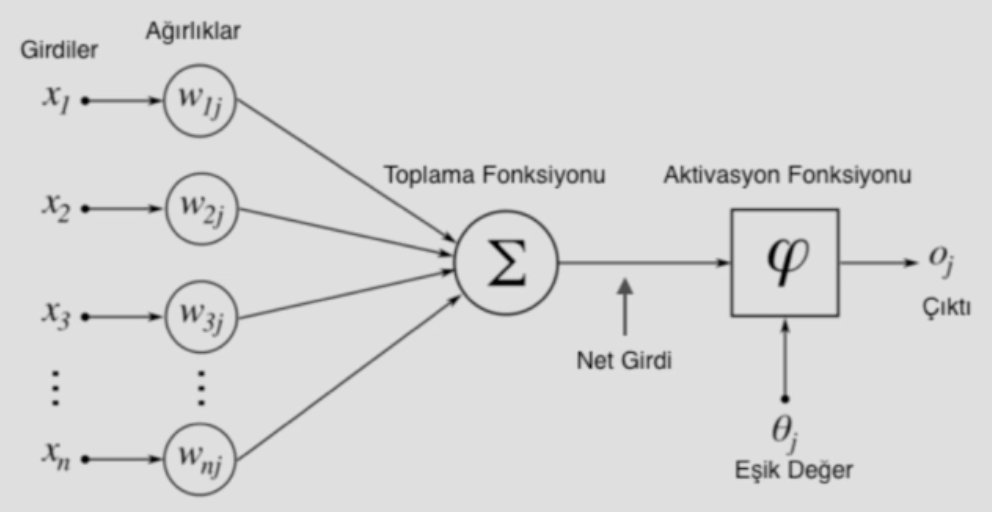

ağırlık değerleri (katsayılar) aslında her bir bağımsız değişkenin çıktıya olan etkisini kontrol eder

Girdiler, bağımsız değişkenlerin değerleridir örneğin burada n tane değişken olduğunda 1. değişkenin değeri 2. değişkenin değeri... bu değerler geldiğinde belirli katsayılarla (Ağırlıklar) çarpılıp (yani bu değerlerin ve genelinde değişkenlerin çıktıya olan etkilerini ayarlanması söz konusu olur. her bir bağımsız değişkenin bağımlı değişkene olan etkisi aynı olmamış oluyor) toplama fonksiyonuna aktarılır.
toplama fonksiyonu her bir girdi değeriyle ağırlıkların çarpılması sonrası çıkan sonuçları kendisinde toplayıp aktivasyon fonksiyonuna aktarıyor. sınıflandırma problemleri, regresyon problemleri buna benzer amaçlarımız ve problemler için  bu aktarma işlemi belirli bir eşik değer, belirli bir dönüştürme işlemine tabii tutulduktan sonra çıktıya aktarılır.

birbirinden farklı yapay sinir hücrelerinin bir araya gelerek oluşturduğu yapıya, yapay sinir ağı adını veriyoruz

bir yapay sinir ağında amacımız gerçek değerler var, tahmin edilen değerler var bu değerler arasındaki farkları minimum hale getirecek şekilde katsayılar veya karar kuralları çıkarırız dolayısıyla burada bu işlemi gerçekleştirmek için sık kullanılan yayılım algoritmalarından birisi geriye yayılım algoritması yapay sinir ağlarının çok katmanlı bir yapısıdır kuralı ise delta kuralıdır.

girdi değerleri ağa gönderilir, 1. iterasyon (epok) gerçekleşir ve tahmin sonucu elde edilir bu tahmin değeri gerçek sonuçla karşılaştırılır 2. iterasyon başlamış olur. bu iterasyonlar (epoklar) tamamlandığında ağırlıkların her iterasyonda değişir buna öğrenme adı verilir

epok işlemleri tamamlandığında optimum katsayı değerleri elde edilir.

In [ ]:
# bağımsız değişkenlerin ağırlıkları, sonucu ektiler.

## Yapay Sinir Ağları - Model & Tahmin

In [1]:
# uyarılar gözükmesin diye
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
# veri setimizi import edelim
diabetes = pd.read_csv("diabetes.csv")

In [3]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                   random_state=42)

#### Standartlaştırma İşlemi

In [5]:
# dönüştürme
# standartlaştırma işlemi gerçekleştireceğim
# yapay sinir ağları değişkenlerin ölçeklerinden etkilenir

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # standartlaştırma işlemini yapacak olan nesneyi oluşturdum

In [7]:
# eğitim seti için standartlaştırma işlemi
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [8]:
# test seti için standartlaştırma işlemi
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled[:3]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576]])

In [10]:
X_test_scaled[:3]

array([[ 0.52338715, -0.73944644, -0.44460031,  0.72004197,  0.95606675,
         0.23273334, -0.15228198,  0.7860505 ],
       [-0.59092098, -0.28934861,  0.32999837,  0.66112249, -0.69104306,
         0.43377686, -1.07730552, -1.05908052],
       [-0.59092098, -0.41794799, -0.17121254, -1.2243009 , -0.69104306,
        -0.14570152, -1.04450327, -1.05908052]])

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
# modeli kuruldu
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [13]:
# katsayılar/ağırlıklar
mlpc.coefs_[:1]

[array([[ 1.61282582e-01,  6.66880320e-02, -1.73445227e-01,
          9.82296038e-02,  4.48226663e-02,  2.74615038e-02,
         -3.11759359e-01, -5.09183016e-01,  4.41538199e-02,
         -3.61523825e-02, -4.13294907e-01,  6.16415072e-02,
         -2.59527596e-01,  7.79656367e-02, -1.74825532e-01,
         -3.35079944e-01, -2.36388518e-01,  1.05466110e-01,
         -4.49262548e-02, -1.05762398e-01,  9.99248968e-02,
          2.36494088e-02, -1.75439869e-01, -3.27171268e-01,
         -2.65305709e-02,  1.80579792e-01, -1.02894655e-01,
          1.07296173e-01,  1.14314497e-01, -6.11285774e-02,
         -2.48606476e-02, -8.23052539e-02, -1.70861779e-01,
          9.04575981e-02,  2.71487584e-01,  3.47102182e-01,
         -2.68190240e-01,  1.04225916e-01,  1.97868931e-01,
         -1.55918603e-01,  6.69222602e-02, -5.57849047e-02,
         -6.66189997e-02,  1.59790967e-01, -5.74777155e-02,
         -2.86019931e-01, -9.65544177e-02, -1.16393187e-02,
         -2.25707168e-01,  2.51263526e-0

In [14]:
# tahmin edilen y değerleri
y_pred = mlpc.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score
# doğruluk oranını hesaplayalım
accuracy_score(y_test, y_pred)

0.7445887445887446

## Yapay Sinir Ağları - Model Tuning

In [16]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

In [17]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

* hidden_layer_sizes=(100,) : tek bir katmanın olduğu ve bu katmanın 100 sinir hücresi içerdiği bir yapıyı ifade eder.
* hidden_layer_sizes=(100, 10) : iki katmanlı bir sinir ağı modelini tanımlar ve bu iki katmanın sırasıyla 100 ve 10 sinir hücresi içerdiğini gösterir.

In [18]:
?mlpc

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...>               tol=0.0001, validation_fraction=0.1, verbose=False,
           warm_start=False)
File:        /opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyp

* relu ve logistic aktivasyon fonksiyonlarını kullanalım.
* solver, ağırlıklar/katsayıları optimize eder. (lbfgs, sgd)
* solver algoritmalarından olan adam ön tanımlıdır ve büyük veri setleri için idealdir.
* learning_rate parametresi ise fonksiyondur ve ağırlıkların güncellenmesini sağlar. ön tanımlı değerini kullanacağız
* alpha: cezalandırma terimi

In [19]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [20]:
# MLPClassifier, çok katmanlı bir yapay sinir ağı (Multi-Layer Perceptron, MLP) 
# tabanlı bir sınıflandırıcı oluşturmak için kullanılır.
mlpc = MLPClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV
mlpc_cv_model = GridSearchCV(mlpc, 
                             mlpc_params,
                            cv=10,
                            n_jobs= -1,
                            verbose = 2)

In [22]:
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],


In [24]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [25]:
# final modeli
mlpc_tuned = MLPClassifier(activation = "relu",
                        alpha = 0.02,
                        hidden_layer_sizes = (100,100,100),
                        solver = "sgd")

In [26]:
# modeli kurdum
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
# tahmin
y_pred = mlpc_tuned.predict(X_test_scaled)

In [28]:
# doğruluk oranı
accuracy_score(y_test, y_pred)

0.7575757575757576